In [1]:
#import all the necessary modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
#read the dataset from remote machine 

In [4]:
A = pd.read_csv("C:/Users/vipul ghare/Desktop/ETL Hive/csvfiles/practise/Mall_Customers.csv")

In [5]:
#preview the dataset

In [6]:
A.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
#Get information about the dataset

In [8]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
#describe function will tell you more about the dataset

In [11]:
A.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
#check for any null value

In [13]:
A.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
#Declare Predictor varibale

In [17]:
X = A[["Annual Income (k$)","Spending Score (1-100)"]]

In [19]:
X.head(5)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
#To find the best value of clusters

In [21]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1,10,1):
    km = KMeans(n_clusters=i)
    model = km.fit(X)
    WCSS.append(round(model.inertia_,2))

C:\Users\vipul ghare\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
WCSS

[269981.28,
 183116.43,
 106348.37,
 73679.79,
 44448.46,
 37233.81,
 30552.71,
 24986.53,
 21826.94]

In [24]:
#Plot the elbow curve

Text(0.5, 1.0, 'Elbow Curve - KMEANS')

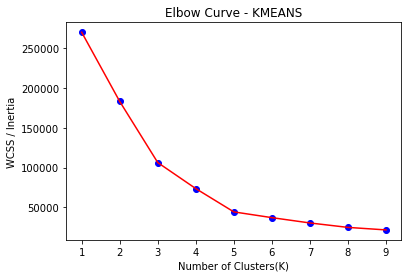

In [25]:
plt.scatter(range(1,10,1),WCSS,c="blue")
plt.plot(range(1,10,1),WCSS,c="red")
plt.xlabel("Number of Clusters(K)")
plt.ylabel("WCSS / Inertia")
plt.title("Elbow Curve - KMEANS")

In [26]:
#Train the Model

In [32]:
km = KMeans(n_clusters=5)
model = km.fit(X)
X["Cluster_no"] = model.labels_

<ipython-input-32-c435bc40e486>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster_no"] = model.labels_


In [34]:
X.head(5)

,Annual Income (k$),Spending Score (1-100),Cluster_no
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2


In [37]:
#ploting the graph

Text(0, 0.5, 'Spending Score')

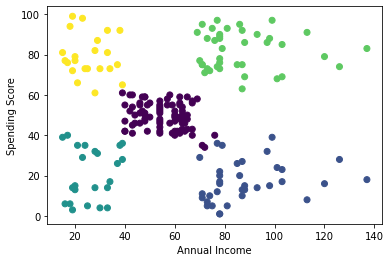

In [38]:
import matplotlib.pyplot as plt
plt.scatter(X["Annual Income (k$)"],X['Spending Score (1-100)'],c=model.labels_)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

In [42]:
#Cluster Centers

In [43]:
Q = pd.DataFrame(model.cluster_centers_,columns=["Q1","Q2","Q3"])

Text(0, 0.5, 'Spending Score')

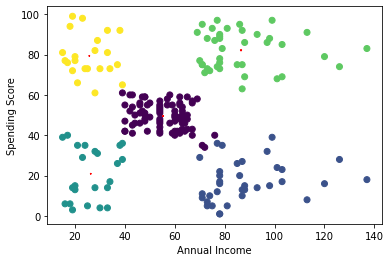

In [49]:
import matplotlib.pyplot as plt
plt.scatter(X["Annual Income (k$)"],X['Spending Score (1-100)'],c=model.labels_)
plt.scatter(Q.Q1,Q.Q2,Q.Q3,c="red",alpha=1,marker="*")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")